# <center > OpenCV with Python </center>

## Problems in Computer Vision

* Camera sensor & lens limitaiton
* View Point Variation
* Changing lighting
* scaling
* Non-rigid deformation
* Occlusion - partially blocked images
* Clutter - noisy background
* Object class variation
* Ambiguous images / Optical illusions

### What are images and representation?
* Images - 2D representaion of visible light spectrum. 
* OpenCV uses **RBG** color space by default.
* Each pixel cordinate(x,y) contains 3 values ranging for intensities of 0 to 255(8 bit).
* images are stored in multi dimentional array.

#### Black and White or Grayscale images - 
* Stored in 2 dimentional array.
* There are 2 type of B&W images.
    * Grayscale - Ranges of shades of gray. 
    * Binary - pixel are either black and white.    

In [1]:
import cv2 
import numpy
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
cv2.__version__

'3.1.0'

In [3]:
def show(image, title=""):
    
    # Figure size in inches
    plt.figure(figsize=(6, 6))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    plt.title(title)
    


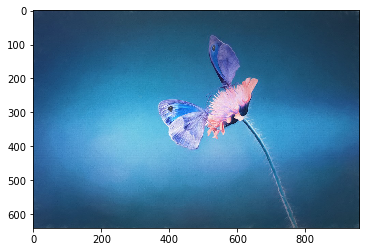

In [4]:
input = cv2.imread('./images/butterfly.jpg')
plt.imshow(input) 
# cv2.imshow('butterfly',input)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
# shape of image
#(height,width)

input.shape

(640, 960, 3)

In [6]:
# save the images in OpenCV

cv2.imwrite('./images/output.jpg',input)

True

### Grayscaling

* Images are converted colored to shades of grey.
* Helps in noise reduction and increase in processing time. 

### Convert color image to grayscale

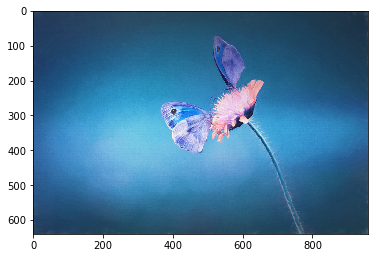

In [7]:
import cv2

# Load the image

image = cv2.imread('./images/butterfly.jpg')
show(image)


# cv2.imshow('Original',image)
#cv2.waitKey()

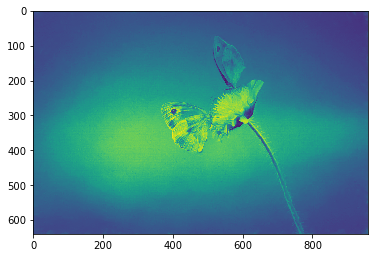

In [8]:
# convertion to grayscale
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show(gray_image)
# cv2.imshow('Grayscale',gray_image)
# cv2.waitKey()
# cv2.destroyAllWindows()

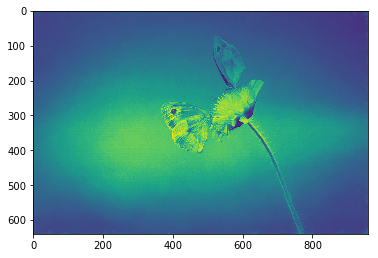

In [9]:
# Another faster method to do so

img = cv2.imread('./images/butterfly.jpg',0)
show(img)

# cv2.imshow('Grayscale',img)
# cv2.waitKey()
#cv2.destroyAllWindows()

## Color Spaces

* RGB, HSV, CMYK
* OpenCV uses RBG, but **actual order is BGR and stored in RGB.**

### HSV Color Space
![HSV](images/HSV.png)

* Hue, Saturation, Value/Brightness represent the color human percieve it.
* Store color information in a cylindrical representation of RGB color points.
    * Hue - Color value (0-179)
    * Saturation - Vibrancy of color (0-255)
    * Value - Brightness or intensity (0-255)
* In **RGB color** , specific color filtering **isn't easy**.
* **HSV** makes it **much easier** to set color ranges to filter specific colors as we perceive them.
![color specs](images/color_hsv.jpg)

    * Red - 165 to 15
    * Green - 45 to 75
    * Blue - 90 to 120

In [10]:
import cv2
import numpy as np

image = cv2.imread('./images/butterfly.jpg')

In [11]:
# size of the image
print("Shape of the image - ",image.shape)

# BGR value of the first pixel
B, G, R = image[0, 0]
print("B G R - ",B, G, R)

Shape of the image -  (640, 960, 3)
B G R -  70 91 119


In [12]:
gray_image = cv2.imread('./images/butterfly.jpg',0)
print(gray_image.shape)

(640, 960)


In [13]:
gray_image[0,0]

97

### Using HSV Color Space  

* Useful for color filtering.

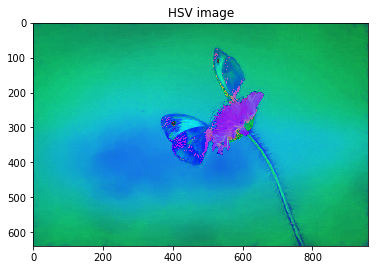

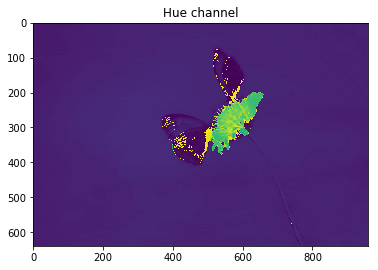

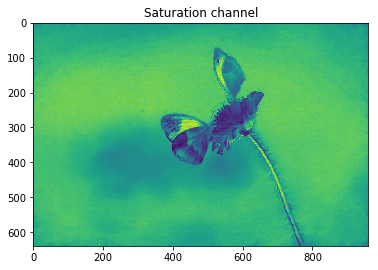

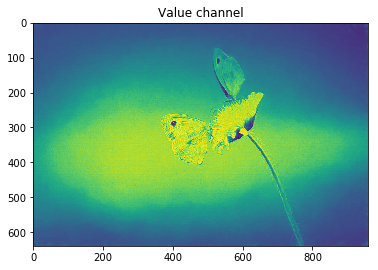

In [14]:
# H : 0-180, S : 0-255, V : 0-255

import cv2
image = cv2.imread('./images/butterfly.jpg')
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# cv2.imshow('HSV image',hsv_image)
show(hsv_image,'HSV image')

# cv2.imshow('Hue channel',hsv_image[:,:,0])
show(hsv_image[:,:,0],'Hue channel')

# cv2.imshow('Saturation channel',hsv_image[:,:,1])
show(hsv_image[:,:,1],'Saturation channel')


# cv2.imshow('Value channel',hsv_image[:,:,2])
show(hsv_image[:,:,2],'Value channel')

# cv2.waitKey()
# cv2.destroyAllWindows()

In [15]:
hsv_image.shape

(640, 960, 3)

### Exploring indivisual channel in RGB image

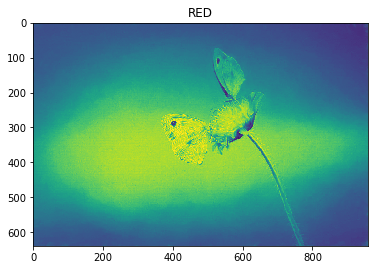

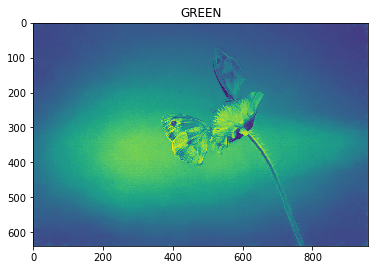

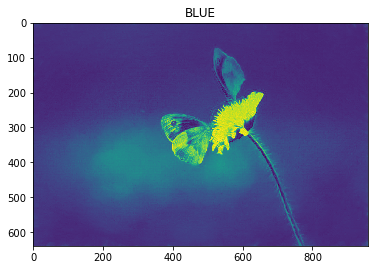

In [16]:
import cv2

image = cv2.imread('./images/butterfly.jpg')

# split function splits the image into each color index
B, G, R = cv2.split(image)

# cv2.imshow('RED',R)
show(R,'RED')

# cv2.imshow('GREEN',G)
show(G,'GREEN')

# cv2.imshow('BLUE',B)
show(B,'BLUE')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Remake the original image

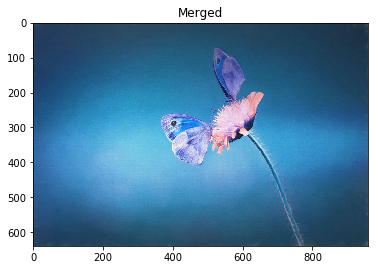

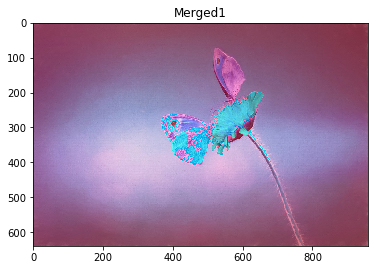

In [17]:
merged = cv2.merge([B, G, R])
# cv2.imshow("Merged",merged)
show(merged,'Merged')

# amplify the blue color
merged1 = cv2.merge([B+100, G, R])

# cv2.imshow("merged with blue",merged1)
show(merged1,"Merged1")

# cv2.waitKey(0)
# cv2.destroyAllWindows()

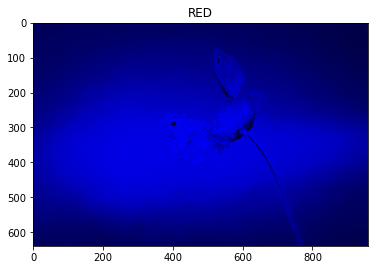

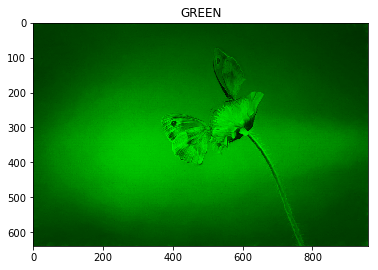

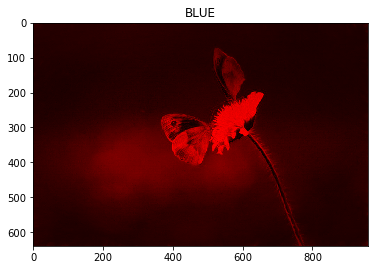

In [18]:
# create image with one color channel

import cv2 
import numpy as np
image = cv2.imread('./images/butterfly.jpg')

B, G, R = cv2.split(image)

# create a matrix of zeros with dimention h x w

zeros = np.zeros(image.shape[:2],dtype="uint8")

# cv2.imshow('RED',cv2.merge([zeros, zeros, R]))
show(cv2.merge([zeros, zeros, R]),'RED')

# cv2.imshow('GREEN',cv2.merge([zeros, G, zeros]))
show(cv2.merge([zeros, G, zeros]),'GREEN')

# cv2.imshow('BLUE',cv2.merge([B, zeros, zeros]))
show(cv2.merge([B, zeros, zeros]),'BLUE')

# cv2.waitKey(0)
# cv2.destroyAllWindows()


## Visualise the image with Histogram 

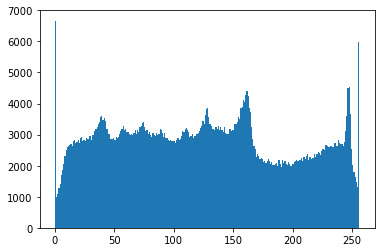

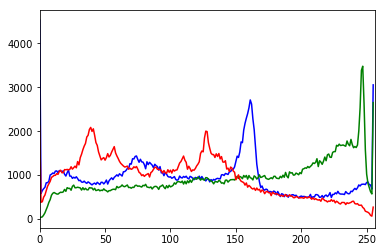

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./images/nature.jpg')

histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# ravel flaten our image array 
plt.hist(image.ravel(),256,[0,256]);plt.show()


color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2,color= col)
    plt.xlim([0,256])
plt.show()    

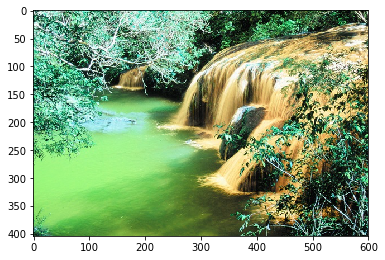

In [20]:
show(image)

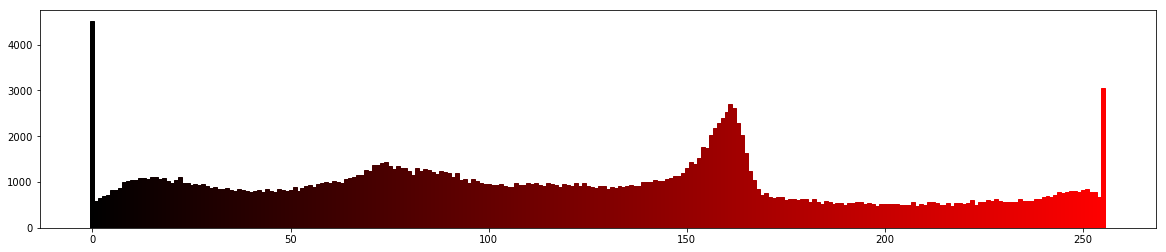

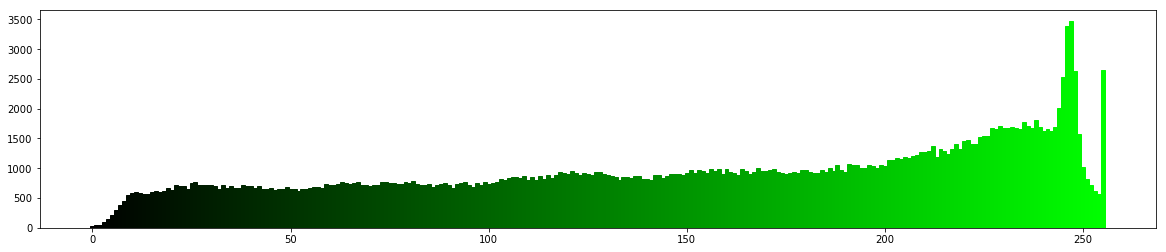

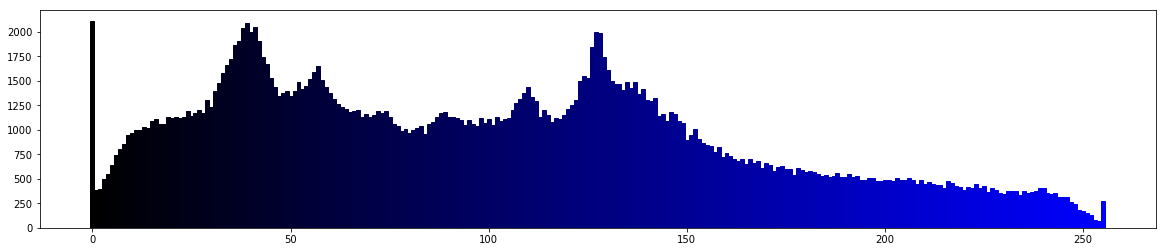

In [21]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)

        plt.show()
        
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./images/nature.jpg')
show_rgb_hist(image)


# Image Manipulation


## 1.Transformation - A geometric distortions enacted upon the image.
***
* We use transformation to correct the distortion or perspective issues from arising from the point of view an image was captured.
<br><br>
**Example-**
    * Resizing , Rotation, Translation
<br><br>
**Types - **
    * Affine
    * Non-Affine
    
<img></img>

Translational matrix 
 [[   1.    0.  350.]
 [   0.    1.  225.]]


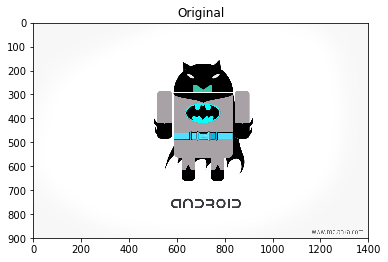

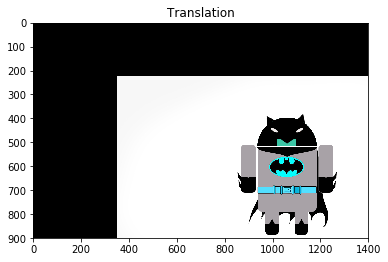

In [24]:
# Affine translation - simply shift the position of the image.

image = cv2.imread('images/batman.jpg')

# store the height and width of the image.
height, width = image.shape[:2]

quarter_height, quarter_width = height/4, width/4

# T is translation matrix

#     |1 0 Tx|
# T = |0 1 Ty|

T = np.float32([[1, 0, quarter_width],[0, 1, quarter_height]])

# we use warpAffine to transform the image using matrix T.
img_translation = cv2.warpAffine(image, T, (width, height))
show(image,'Original')
show(img_translation,'Translation')

print("Translational matrix \n",T)

# Rotations

In [ ]:
# rotation by inbuilt function

# using previous image

# Divided by 2 to rotate the image around it's centre. 
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (height,width))
show(image,'Original')
show(img_translation,'Translation')